# Predicting Employee Attrition

## Initial imports of libraries and tools

In [277]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
	
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.utils import resample

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

### The dataset is a Kaggle dataset created by IBM

In [278]:
# load the dataset
df = pd.read_csv("../data/IBM_HR_Data_newer.csv")

# set so it displays all columns
pd.set_option('display.max_columns', None)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [279]:
# look at the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [280]:
# look at the numeric columns
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [281]:
# check for NAs
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [282]:
# as there are not many NAs I will drop them from the dataframe
df = df.dropna()

In [283]:
# look at values in target 'Attrition'
df.Attrition.unique()

array(['Voluntary Resignation', 'Current employee'], dtype=object)

In [284]:
# make target column binary
cleanup_att = {"Attrition": {"Current employee": 0, "Voluntary Resignation": 1}}

In [285]:
df.replace(cleanup_att, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [286]:
# drop columns that contain no unique values or that aren't useful for modeling
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Application ID', 'Over18', 'StandardHours'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [287]:
# convert 'DistanceFromHome', 'HourlyRate', 'JobSatisfaction', 'PercentSalaryHike', and 'MonthlyIncome' to floats 
# to eliminate warning received when adding in categorical features 

In [288]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype(float)

In [289]:
df['HourlyRate'] = df['HourlyRate'].astype(float)

In [290]:
df['JobSatisfaction'] = df['HourlyRate'].astype(float)

In [291]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(float)

In [292]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)

In [293]:
# identify target/split off target
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [294]:
# target balance
df.Attrition.value_counts(normalize=True)

0    0.841665
1    0.158335
Name: Attrition, dtype: float64

In [295]:
# train test split (reminder not to touch test data until the end)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2020)

In [296]:
# check shapes
print(X_train.shape, y_train.shape)

(18563, 31) (18563,)


In [297]:
# isolate numerical columns
X_train_num = X_train.select_dtypes(exclude='object')

In [298]:
X_train_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13922,46.0,706.0,2.0,2.0,4.0,82.0,3.0,3.0,82.0,8578.0,19989.0,3.0,14.0,3.0,3.0,1.0,12.0,4.0,2.0,9.0,8.0,4.0,7.0
14298,35.0,853.0,18.0,5.0,1.0,40.0,2.0,3.0,40.0,9884.0,8302.0,2.0,13.0,3.0,3.0,1.0,10.0,3.0,3.0,4.0,0.0,2.0,3.0
18228,45.0,950.0,28.0,3.0,4.0,99.0,3.0,5.0,99.0,19431.0,15302.0,2.0,13.0,3.0,3.0,0.0,21.0,3.0,2.0,6.0,0.0,1.0,3.0
3827,39.0,1251.0,21.0,4.0,1.0,32.0,1.0,2.0,32.0,5736.0,3987.0,7.0,19.0,3.0,3.0,1.0,10.0,1.0,3.0,3.0,2.0,1.0,2.0
20886,42.0,933.0,19.0,3.0,3.0,79.0,2.0,3.0,79.0,10008.0,12023.0,1.0,14.0,3.0,4.0,0.0,31.0,0.0,2.0,10.0,9.0,5.0,9.0


In [299]:
# scale numerical data
ss = StandardScaler()
X_tr_sc = pd.DataFrame(ss.fit_transform(X_train_num), index= X_train_num.index, columns= X_train_num.columns)
X_tr_sc

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13922,1.000427,-0.235243,-0.888368,-0.882942,1.170791,0.798439,0.385196,0.842296,0.798439,0.437507,0.796828,0.128530,-0.331030,-0.426856,0.269089,0.243801,0.094746,0.932007,-1.076804,0.322302,1.036295,0.561790,0.798056
14298,-0.207917,0.129592,1.084582,2.033437,-1.563887,-1.266880,-1.023193,0.842296,-1.266880,0.714623,-0.847122,-0.272663,-0.604137,-0.426856,0.269089,0.243801,-0.163593,0.157400,0.339228,-0.495077,-1.166280,-0.058216,-0.318320
18228,0.890577,0.370333,2.317675,0.089184,1.170791,1.634401,0.385196,2.649767,1.634401,2.740372,0.137532,-0.272663,-0.604137,-0.426856,0.269089,-0.936913,1.257275,0.157400,-1.076804,-0.168126,-1.166280,-0.368220,-0.318320
3827,0.231481,1.117375,1.454510,1.061311,-1.563887,-1.660274,-2.431581,-0.061440,-1.660274,-0.165528,-1.454090,1.733302,1.034504,-0.426856,0.269089,0.243801,-0.163593,-1.391813,0.339228,-0.658553,-0.615636,-0.368220,-0.597415
20886,0.561029,0.328141,1.207891,0.089184,0.259232,0.650916,-1.023193,0.842296,0.650916,0.740935,-0.323708,-0.673856,-0.331030,-0.426856,1.194451,-0.936913,2.548973,-2.166420,-1.076804,0.485777,1.311617,0.871793,1.356245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,0.121631,-1.570487,-1.011677,0.089184,0.259232,0.749264,0.385196,0.842296,0.749264,0.285369,0.150895,0.529723,-0.331030,-0.426856,1.194451,-0.936913,-0.163593,0.932007,1.755261,-0.985504,-1.166280,-0.678223,-1.155603
12071,1.439824,-1.203171,-0.148512,1.061311,1.170791,-0.578441,0.385196,-0.965176,-0.578441,-0.560408,-0.610664,2.535688,-0.057923,-0.426856,1.194451,0.243801,-0.938612,-0.617207,0.339228,-0.822028,-0.615636,-0.058216,-0.597415
15100,-0.207917,0.045208,1.084582,2.033437,-0.652328,-0.873486,1.793584,-0.061440,-0.873486,-0.277563,1.686251,0.128530,-1.150350,-0.426856,1.194451,-0.936913,0.611426,-0.617207,0.339228,1.466632,2.963548,-0.368220,1.635339
7554,-0.976863,0.139519,0.098107,0.089184,0.259232,-0.332569,0.385196,-0.061440,-0.332569,-0.606028,-0.902403,0.128530,-0.604137,2.342710,1.194451,-0.936913,-0.163593,0.932007,1.755261,0.158826,0.760973,-0.368220,0.798056


In [300]:
# add in one hot encoded
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_t_cat = X_train.select_dtypes(include= 'object')

#fit transform
X_t_oh = pd.DataFrame(ohe.fit_transform(X_t_cat), index= X_t_cat.index, columns=ohe.get_feature_names(X_t_cat.columns))
X_t_oh.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
13922,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20886,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [301]:
# merge databases
X_tr_sc = pd.merge(X_tr_sc, X_t_oh, left_index=True, right_index=True)

In [302]:
X_tr_sc.shape

(18563, 53)

In [303]:
# smote the training data (reminder to self; do not smote test data)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_tr_sm, y_tr_sm = smote.fit_sample(X_tr_sc, y_train) 

## First Simple Model
### Logistic regression does not perform very well  even after tuning several hyper parameters. I will move onto other models that usually perform better in binary classification such as Random Forest and K Nearest Neighbor

In [304]:
# create validation data
X_t, X_val, y_t, y_val = train_test_split(X_tr_sc, y_train, test_size = 0.20, random_state = 2020)

In [305]:
# smote
smote2 = SMOTE()
X_t_sm, y_t_sm = smote2.fit_sample(X_t, y_t)

In [306]:
# instantiate model
lg = LogisticRegression()

# fit model
lg.fit(X_t_sm, y_t_sm)

# check accuracy on training data
lg.score(X_t_sm, y_t_sm)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6910588611644274

In [307]:
# validation testing

# set predictions
pred_lg_val = lg.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_lg_val))
print(classification_report(y_val, pred_lg_val))

[[2170  979]
 [ 181  383]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      3149
           1       0.28      0.68      0.40       564

    accuracy                           0.69      3713
   macro avg       0.60      0.68      0.59      3713
weighted avg       0.83      0.69      0.73      3713



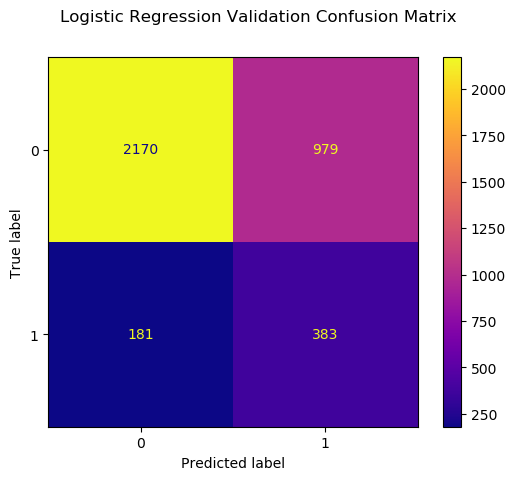

In [308]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression Validation Confusion Matrix ")

plot_confusion_matrix(lg, X_val, y_val, ax=ax, cmap="plasma");

## Support Vector Machine (SVM)

In [309]:
# instantiate model
svm = svm.SVC()

# fit model
svm.fit(X_t_sm, y_t_sm)

# check accuracy on training data
svm.score(X_t_sm, y_t_sm)

0.982725527831094

In [310]:
# validation testing

# set predictions
pred_svm_val = svm.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_svm_val))
print(classification_report(y_val, pred_svm_val))

[[3039  110]
 [  23  541]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3149
           1       0.83      0.96      0.89       564

    accuracy                           0.96      3713
   macro avg       0.91      0.96      0.93      3713
weighted avg       0.97      0.96      0.97      3713



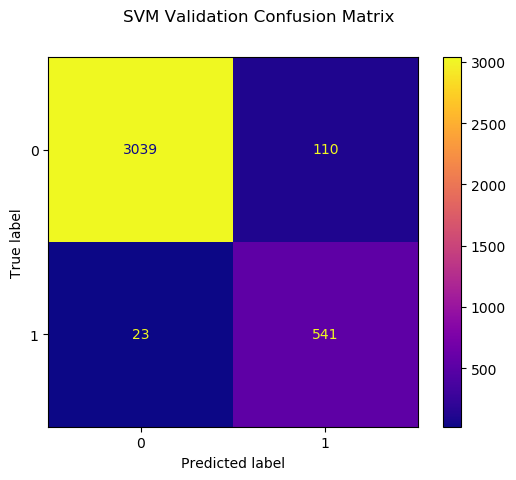

In [311]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("SVM Validation Confusion Matrix ")

plot_confusion_matrix(svm, X_val, y_val, ax=ax, cmap="plasma");

## Random Forest Classifier

In [312]:
# instantiate model
rfm = RandomForestClassifier()

# fit model
rfm.fit(X_t_sm, y_t_sm)

# check accuracy
rfm.score(X_t_sm, y_t_sm)

1.0

In [313]:
# validation testing

# set predictions
pred_rfm_val = rfm.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm_val))
print(classification_report(y_val, pred_rfm_val))

[[3148    1]
 [  10  554]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3149
           1       1.00      0.98      0.99       564

    accuracy                           1.00      3713
   macro avg       1.00      0.99      0.99      3713
weighted avg       1.00      1.00      1.00      3713



In [314]:
# adjust some hyper parameters to address overfitting

# instantiate model
rfm2 = RandomForestClassifier(n_estimators=50, max_depth=50, max_leaf_nodes=500)

# fit model
rfm2.fit(X_t_sm, y_t_sm)

# check accuracy on training data
rfm2.score(X_t_sm, y_t_sm)

0.9969609724888036

In [315]:
# validation testing

# set predictions
pred_rfm2_val = rfm2.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_rfm2_val))
print(classification_report(y_val, pred_rfm2_val))

[[3134   15]
 [  35  529]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3149
           1       0.97      0.94      0.95       564

    accuracy                           0.99      3713
   macro avg       0.98      0.97      0.97      3713
weighted avg       0.99      0.99      0.99      3713



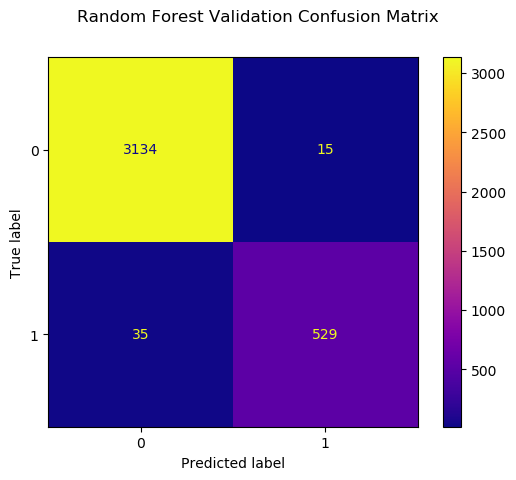

In [316]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Random Forest Validation Confusion Matrix ")

plot_confusion_matrix(rfm2, X_val, y_val, ax=ax, cmap="plasma");

### K Nearest Neighbor (KNN)

In [317]:
# instantiate model
knn = KNeighborsClassifier()
# fit model
knn = knn.fit(X_t_sm, y_t_sm)
# check accuracy
knn.score(X_t_sm, y_t_sm)

0.9942818298144593

In [318]:
# validation testing

# set predictions
pred_knn_val = knn.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_knn_val))
print(classification_report(y_val, pred_knn_val))

[[3064   85]
 [   4  560]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3149
           1       0.87      0.99      0.93       564

    accuracy                           0.98      3713
   macro avg       0.93      0.98      0.96      3713
weighted avg       0.98      0.98      0.98      3713



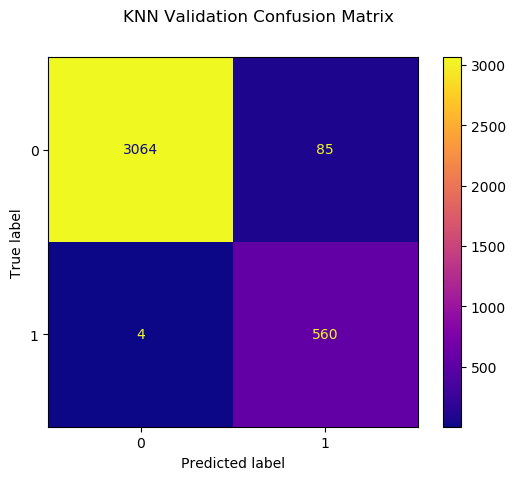

In [319]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Validation Confusion Matrix ")

plot_confusion_matrix(knn, X_val, y_val, ax=ax, cmap="plasma");

## Model Stacking

In [320]:
from sklearn.ensemble import StackingClassifier

# Create Base Learners
base_learners = [
                 ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('knn', KNeighborsClassifier(n_neighbors=5))             
                ]

# Initialize Stacking Classifier with the Meta Learner
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Extract score
clf.fit(X_t_sm, y_t_sm).score(X_t_sm, y_t_sm)

1.0

In [321]:
# validation testing

# set predictions
pred_clf_val = clf.predict(X_val)

# confusion matrix and classification report
print(confusion_matrix(y_val, pred_clf_val))
print(classification_report(y_val, pred_clf_val))

[[3144    5]
 [   6  558]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3149
           1       0.99      0.99      0.99       564

    accuracy                           1.00      3713
   macro avg       0.99      0.99      0.99      3713
weighted avg       1.00      1.00      1.00      3713



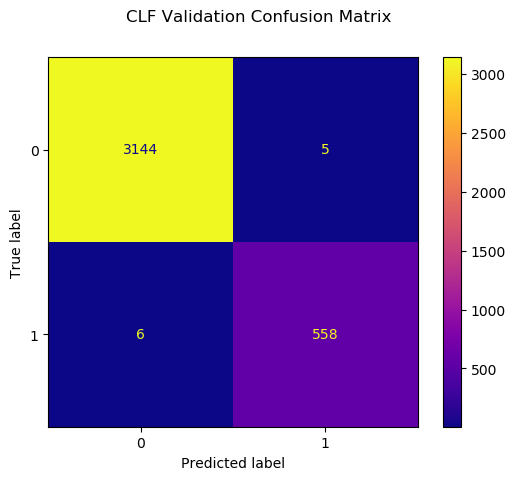

In [322]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Validation Confusion Matrix ")

plot_confusion_matrix(clf, X_val, y_val, ax=ax, cmap="plasma");

## Pre-Processing Test Data for Modeling

In [323]:
# check shapes
print(X_test.shape, y_test.shape)

(4641, 31) (4641,)


In [324]:
# isolate numerical columns
X_test_num = X_test.select_dtypes(exclude='object')

In [325]:
X_test_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,41.0,143.0,4.0,3.0,1.0,56.0,3.0,2.0,56.0,9355.0,9558.0,5.0,18.0,3.0,3.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0
15040,35.0,817.0,1.0,3.0,4.0,85.0,3.0,3.0,85.0,17924.0,4544.0,1.0,11.0,3.0,2.0,1.0,9.0,3.0,3.0,4.0,2.0,1.0,3.0
7392,28.0,1476.0,16.0,2.0,2.0,68.0,4.0,2.0,68.0,5661.0,4824.0,0.0,19.0,3.0,3.0,0.0,9.0,2.0,3.0,8.0,3.0,0.0,7.0
3900,30.0,1005.0,3.0,3.0,4.0,88.0,3.0,1.0,88.0,2657.0,8556.0,2.0,11.0,3.0,3.0,0.0,8.0,5.0,3.0,5.0,2.0,0.0,4.0
20988,42.0,269.0,2.0,3.0,4.0,56.0,2.0,1.0,56.0,2593.0,8007.0,1.0,11.0,3.0,3.0,1.0,10.0,4.0,3.0,9.0,6.0,7.0,8.0


In [326]:
# scale numerical data
ss = StandardScaler()
X_test_sc = pd.DataFrame(ss.fit_transform(X_test_num), index= X_test_num.index, columns= X_test_num.columns)
X_test_sc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,0.433407,-1.646587,-0.637189,0.088614,-1.593106,-0.501200,0.358484,-0.048270,-0.501200,0.617477,-0.660499,0.900370,0.761778,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,0.167259,0.776422,1.527893,0.826783
15040,-0.221075,0.021022,-1.009507,0.088614,1.165016,0.924208,0.358484,0.858704,0.924208,2.450216,-1.370799,-0.684992,-1.154138,-0.43589,-0.673756,0.236083,-0.287495,0.153823,0.336712,-0.476262,-0.610878,-0.363532,-0.308454
7392,-0.984637,1.651519,0.852081,-0.902364,-0.673732,0.088624,1.762470,-0.048270,0.088624,-0.172597,-1.331133,-1.081332,1.035480,-0.43589,0.251089,-0.919679,-0.287495,-0.622148,0.336712,0.167259,-0.333418,-0.678769,0.826783
3900,-0.766477,0.486172,-0.761295,0.088614,1.165016,1.071663,0.358484,-0.955244,1.071663,-0.815093,-0.802445,-0.288651,-1.154138,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,-0.315382,-0.610878,-0.678769,-0.024645
20988,0.542487,-1.334838,-0.885401,0.088614,1.165016,-0.501200,-1.045502,-0.955244,-0.501200,-0.828781,-0.880219,-0.684992,-1.154138,-0.43589,0.251089,0.236083,-0.160265,0.929794,0.336712,0.328139,0.498962,1.527893,1.110593


In [327]:
# add in categorical features
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_test_cat = X_test.select_dtypes(include= 'object')

X_test_oh = pd.DataFrame(ohe.fit_transform(X_test_cat), index= X_test_cat.index, columns=ohe.get_feature_names(X_test_cat.columns))
X_test_oh.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
47,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7392,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3900,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
# join categorical and numerical dataframes
X_test_final = X_test_sc.join(X_test_oh)

In [329]:
X_test_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
47,0.433407,-1.646587,-0.637189,0.088614,-1.593106,-0.501200,0.358484,-0.048270,-0.501200,0.617477,-0.660499,0.900370,0.761778,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,0.167259,0.776422,1.527893,0.826783,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,-0.221075,0.021022,-1.009507,0.088614,1.165016,0.924208,0.358484,0.858704,0.924208,2.450216,-1.370799,-0.684992,-1.154138,-0.43589,-0.673756,0.236083,-0.287495,0.153823,0.336712,-0.476262,-0.610878,-0.363532,-0.308454,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7392,-0.984637,1.651519,0.852081,-0.902364,-0.673732,0.088624,1.762470,-0.048270,0.088624,-0.172597,-1.331133,-1.081332,1.035480,-0.43589,0.251089,-0.919679,-0.287495,-0.622148,0.336712,0.167259,-0.333418,-0.678769,0.826783,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3900,-0.766477,0.486172,-0.761295,0.088614,1.165016,1.071663,0.358484,-0.955244,1.071663,-0.815093,-0.802445,-0.288651,-1.154138,-0.43589,0.251089,-0.919679,-0.414725,1.705765,0.336712,-0.315382,-0.610878,-0.678769,-0.024645,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.542487,-1.334838,-0.885401,0.088614,1.165016,-0.501200,-1.045502,-0.955244,-0.501200,-0.828781,-0.880219,-0.684992,-1.154138,-0.43589,0.251089,0.236083,-0.160265,0.929794,0.336712,0.328139,0.498962,1.527893,1.110593,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
X_test_final.shape

(4641, 53)

## Re-fit top three models to entire training set

##### Random Forest Classifier

In [331]:
# fit model
rfm2.fit(X_tr_sc, y_train)

# check accuracy on training data
rfm2.score(X_tr_sc, y_train)

0.9945590691159835

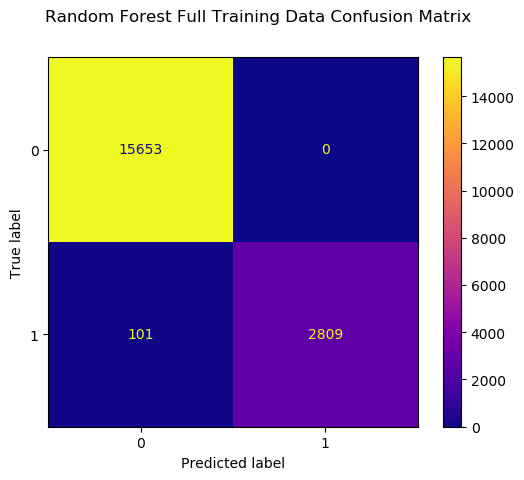

In [332]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Random Forest Full Training Data Confusion Matrix ")

plot_confusion_matrix(rfm2, X_tr_sc, y_train, ax=ax, cmap="plasma");

##### K Nearest Neighbor

In [333]:
# fit model
knn = knn.fit(X_tr_sc, y_train)
# check accuracy
knn.score(X_tr_sc, y_train)

0.9935893982653666

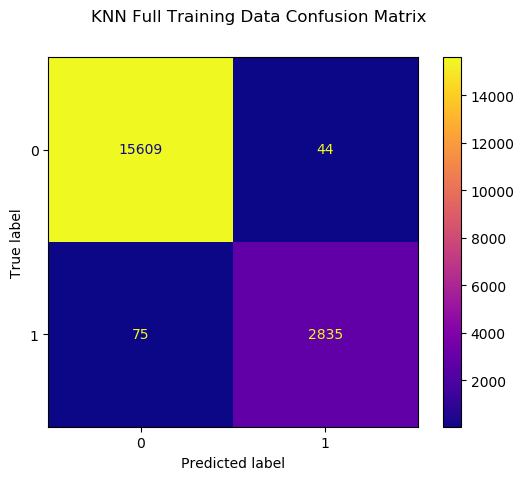

In [334]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("KNN Full Training Data Confusion Matrix ")

plot_confusion_matrix(knn, X_tr_sc, y_train, ax=ax, cmap="plasma");

##### Stacked Model

In [335]:
# fit model
clf = clf.fit(X_tr_sc, y_train)
# check accuracy
clf.score(X_tr_sc, y_train)

0.9998922587943759

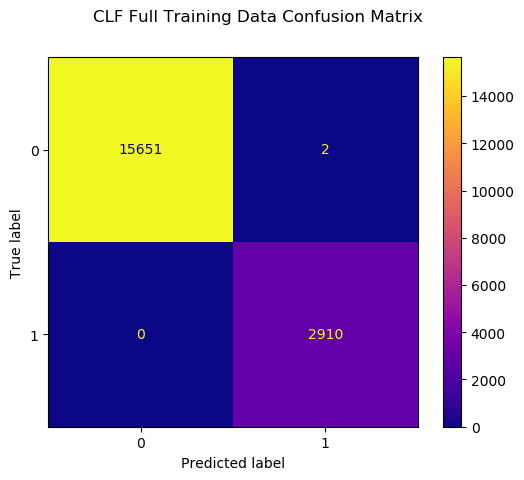

In [336]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("CLF Full Training Data Confusion Matrix ")

plot_confusion_matrix(clf, X_tr_sc, y_train, ax=ax, cmap="plasma");

## Run Models on Test Data

##### Random Forest Classifier

In [337]:
rfm2.score(X_test_final, y_test)

0.8926955397543633

In [338]:
# set predictions
pred_rfm2_test = rfm2.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_rfm2_test))
print(classification_report(y_test, pred_rfm2_test))

[[3876    1]
 [ 497  267]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3877
           1       1.00      0.35      0.52       764

    accuracy                           0.89      4641
   macro avg       0.94      0.67      0.73      4641
weighted avg       0.90      0.89      0.87      4641



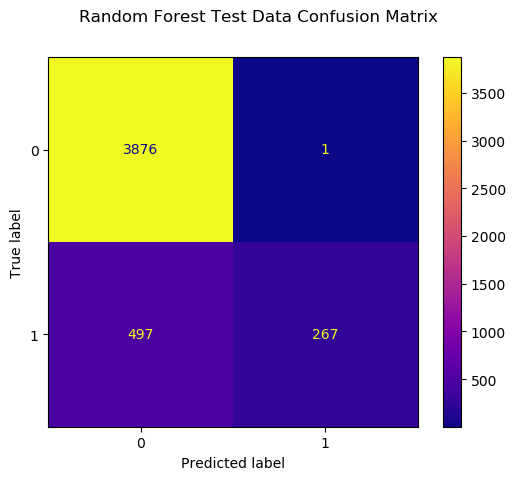

In [339]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Random Forest Test Data Confusion Matrix ")

plot_confusion_matrix(rfm2, X_test_final, y_test, ax=ax, cmap="plasma");

##### K Nearest Neighbor

In [340]:
knn.score(X_test_final, y_test)

0.9719887955182073

In [341]:
# set predictions
pred_knn_test = knn.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_knn_test))
print(classification_report(y_test, pred_knn_test))

[[3837   40]
 [  90  674]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3877
           1       0.94      0.88      0.91       764

    accuracy                           0.97      4641
   macro avg       0.96      0.94      0.95      4641
weighted avg       0.97      0.97      0.97      4641



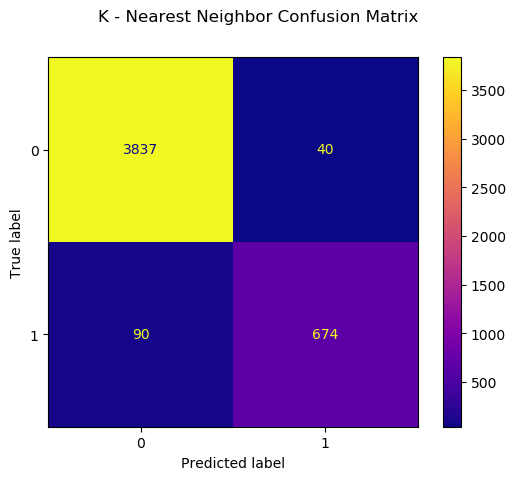

In [342]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("K - Nearest Neighbor Confusion Matrix ")

plot_confusion_matrix(knn, X_test_final, y_test, ax=ax, cmap="plasma");
plt.savefig('../reports/figures/knn_cm.png', transparent=True);

##### Stacked Model

In [343]:
clf.score(X_test_final, y_test)

0.949364361129067

In [344]:
# set predictions
pred_clf_test = clf.predict(X_test_final)

# confusion matrix and classification report
print(confusion_matrix(y_test, pred_clf_test))
print(classification_report(y_test, pred_clf_test))

[[3831   46]
 [ 189  575]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3877
           1       0.93      0.75      0.83       764

    accuracy                           0.95      4641
   macro avg       0.94      0.87      0.90      4641
weighted avg       0.95      0.95      0.95      4641



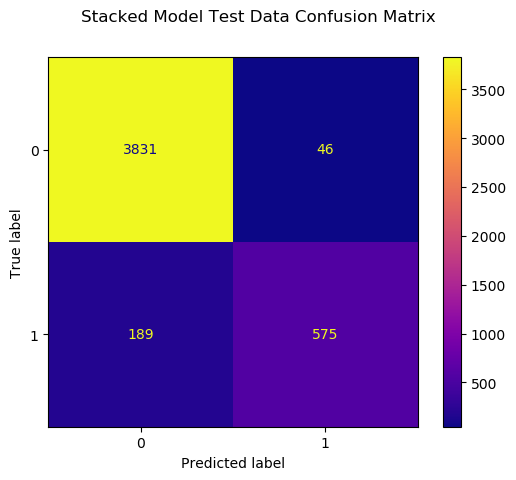

In [345]:
# plot confusion matrix
fig, ax = plt.subplots()

fig.suptitle("Stacked Model Test Data Confusion Matrix ")

plot_confusion_matrix(clf, X_test_final, y_test, ax=ax, cmap="plasma");

## Visualizations

### EDA

In [346]:
# create correlations for plotting correlation to target "Attrition"
corr = create_corr(df, 'Attrition')
corr

{'Age': -0.1524993238235162,
 'Attrition': 1.0,
 'DailyRate': -0.05769343547906254,
 'DistanceFromHome': 0.07052644844437239,
 'Education': -0.03417312343352907,
 'EnvironmentSatisfaction': -0.04924171006028993,
 'HourlyRate': 0.012129223652489805,
 'JobInvolvement': -0.06737604354573849,
 'JobLevel': -0.08273424625510241,
 'JobSatisfaction': 0.012129223652489805,
 'MonthlyIncome': -0.07702788180842465,
 'MonthlyRate': -0.007610568816593316,
 'NumCompaniesWorked': 0.04139935133037734,
 'PercentSalaryHike': -0.02595416117062345,
 'PerformanceRating': -0.006950960397907871,
 'RelationshipSatisfaction': -0.006423341505976501,
 'StockOptionLevel': -0.09395634583604931,
 'TotalWorkingYears': -0.08283863982056681,
 'TrainingTimesLastYear': -0.047668133022653165,
 'WorkLifeBalance': -0.026016453565418717,
 'YearsAtCompany': -0.06160342810031566,
 'YearsInCurrentRole': -0.08587435422465385,
 'YearsSinceLastPromotion': -0.019883821079532366,
 'YearsWithCurrManager': -0.0668372764179082}

['Age', 'Stockoptionlevel', 'Yearsincurrentrole', 'Totalworkingyears', 'Joblevel']
[15.24993238235162, 9.39563458360493, 8.587435422465385, 8.283863982056682, 8.273424625510241]


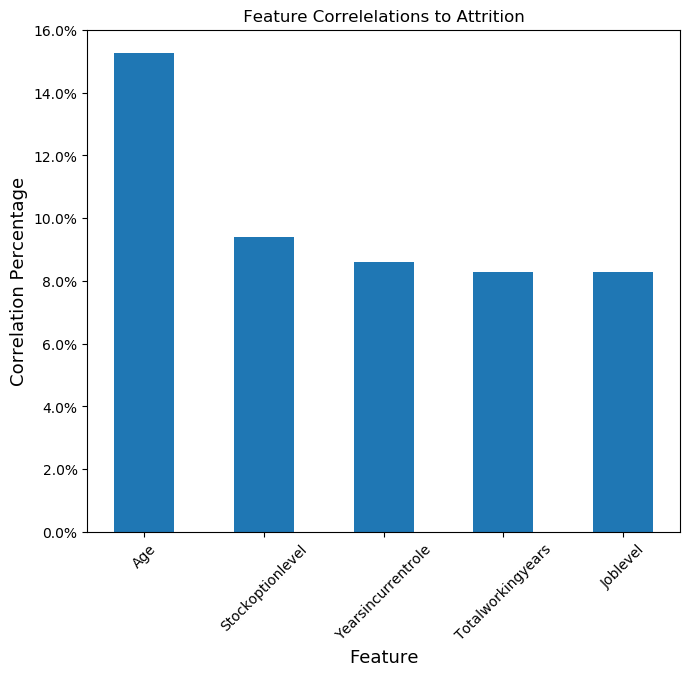

In [347]:
# function to plot feature correlations
def create_plot_of_feature_importances(coeff_dict, top_num=10, figsize=(7, 6), title='Feature Importances', xlabel='Feature', ylabel='Correlation Percentage', append_title='', prepend_title='', width=0.8, xrot=0, bar_colors=None, percent=None, save_path=None):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0].title() for i in features_and_importances[1:top_num+1]]
    print(features)
    importances = [abs(i[1])*100 for i in features_and_importances[1:top_num+1]]
    print(importances)
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=figsize)
#     width = .35
    plt.bar(features, importances, width=width, color=bar_colors)
    if percent:
        ax.yaxis.set_major_formatter(PercentFormatter())
#     plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('Feature', fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.xticks(rotation=xrot)
    plt.axis('tight')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, transparent=True)
min_percent = 0.12
corr = df.corr().Attrition
corr=dict(corr)
create_plot_of_feature_importances(corr, title='Feature Correlelations to Attrition', top_num=5, width=0.5, percent=True)
plt.xticks(rotation=45);
plt.savefig('../reports/figures/corrs.png', transparent=True);

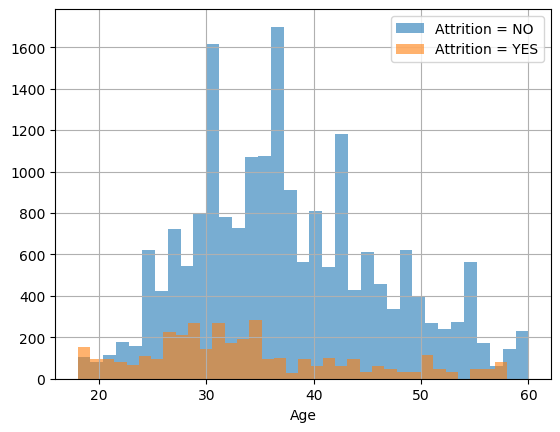

In [348]:
# plot attrition by age
df[df["Attrition"] == 0]['Age'].hist(bins=35,label='Attrition = NO', alpha=0.6)
df[df["Attrition"] == 1]['Age'].hist(bins=35, label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('Age')
plt.savefig('../reports/figures/age_dist.png', transparent=True);

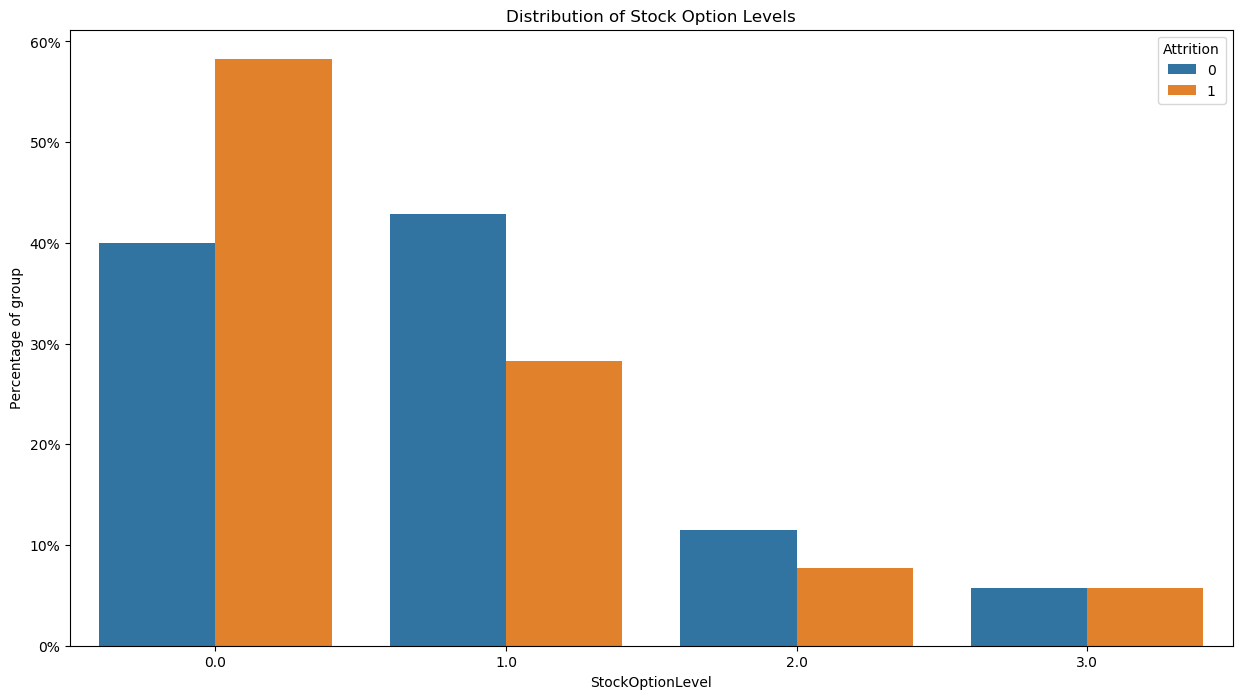

In [357]:
# plot attrition by stock option levels
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["StockOptionLevel"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "StockOptionLevel", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of Stock Option Levels")
# plt.show()
plt.savefig('../reports/figures/stock_dist.png', transparent=True);

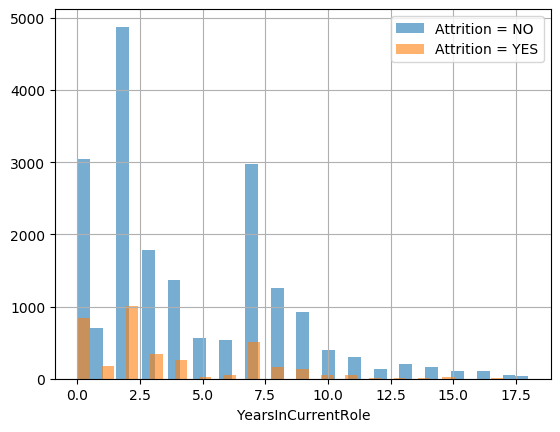

In [350]:
# plot attrition by years in role
df[df["Attrition"] == 0]['YearsInCurrentRole'].hist(bins=35, label='Attrition = NO', alpha=0.6)
df[df["Attrition"] == 1]['YearsInCurrentRole'].hist(bins=35, label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('YearsInCurrentRole');
plt.savefig('../reports/figures/years_role_dist.png', transparent=True);

### Model Feature Importances

In [351]:
# check feature importances from Random Forest model
rfm2.feature_importances_

array([9.60036625e-02, 7.94852448e-02, 5.68815869e-02, 2.63835586e-02,
       2.19690397e-02, 5.08469039e-02, 1.88317757e-02, 1.48718602e-02,
       4.80013705e-02, 6.28553331e-02, 4.48693293e-02, 1.30089559e-02,
       3.61125851e-02, 1.63118412e-03, 2.15629254e-02, 2.15840949e-02,
       3.96294507e-02, 2.63975754e-02, 1.96219156e-02, 3.43530531e-02,
       2.78695559e-02, 2.29359578e-02, 2.48090748e-02, 1.91762191e-02,
       8.04108183e-03, 1.01476292e-02, 1.08133034e-02, 3.02839852e-03,
       3.24250576e-03, 3.22249276e-03, 1.83012587e-03, 4.70285340e-03,
       9.01816383e-03, 3.13753835e-03, 6.84333519e-03, 2.41334383e-03,
       3.32476817e-03, 2.08462749e-03, 4.95012034e-03, 6.96224763e-03,
       4.02211838e-03, 8.10312487e-03, 1.12069191e-02, 2.32395591e-02,
       7.55665226e-03, 4.58027403e-03, 4.02891569e-03, 6.20266332e-03,
       4.69883609e-03, 3.66198865e-03, 3.71875056e-03, 5.50081595e-03,
       2.46333544e-05])

In [352]:
# create list of feature importances 
importances = list(zip(rfm2.feature_importances_, X_test_final.columns))
importances.sort(reverse=True)
importances

[(0.09600366248383978, 'Age'),
 (0.07948524480001556, 'DailyRate'),
 (0.06285533310982656, 'MonthlyIncome'),
 (0.05688158689564387, 'DistanceFromHome'),
 (0.050846903931847175, 'HourlyRate'),
 (0.048001370529907335, 'JobSatisfaction'),
 (0.044869329299393294, 'MonthlyRate'),
 (0.03962945071572683, 'TotalWorkingYears'),
 (0.03611258512785237, 'PercentSalaryHike'),
 (0.034353053102715234, 'YearsAtCompany'),
 (0.027869555893933955, 'YearsInCurrentRole'),
 (0.02639757536203339, 'TrainingTimesLastYear'),
 (0.026383558618644377, 'Education'),
 (0.024809074760060848, 'YearsWithCurrManager'),
 (0.023239559101947815, 'MaritalStatus_Single'),
 (0.02293595776591685, 'YearsSinceLastPromotion'),
 (0.02196903967569443, 'EnvironmentSatisfaction'),
 (0.021584094880874115, 'StockOptionLevel'),
 (0.021562925395983132, 'RelationshipSatisfaction'),
 (0.01962191557477008, 'WorkLifeBalance'),
 (0.01917621910618598, 'BusinessTravel_Travel_Frequently'),
 (0.01883177574597244, 'JobInvolvement'),
 (0.0148718602

In [353]:
# create dictionary of top 5 feature importances
RF_coeff_dict = {'Age': 0.09836381851954874,
 'TotalWorkingYears': 0.04245932955492602,
 'Monthly Income': 0.057710108468710136,
 'Distance From Home': 0.05655919222397819,
 'Job Satisfaction': 0.4340366106210175}

In [354]:
# function to plot feature importances
def create_plot_of_feature_importances(coeff_dict, top_num=10, title='Feature Importances', append_title='Model', prepend_title=''):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    dict_keys = [key for key in coeff_dict.keys()]
    dict_values = [abs(value) for value in coeff_dict.values()]
    
    coeff_dict = {dict_keys[x]: dict_values[x] for x in range(len(dict_values))}
    coeff_dict = dict(list(coeff_dict.items())[:top_num])
    features_and_importances = zip(coeff_dict.keys(), coeff_dict.values())
    features_and_importances = sorted(features_and_importances, key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [abs(i[1]) for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    title = ' '.join([prepend_title, title, append_title])
    plt.title(title)
    plt.xlabel('importance')
    plt.tight_layout()

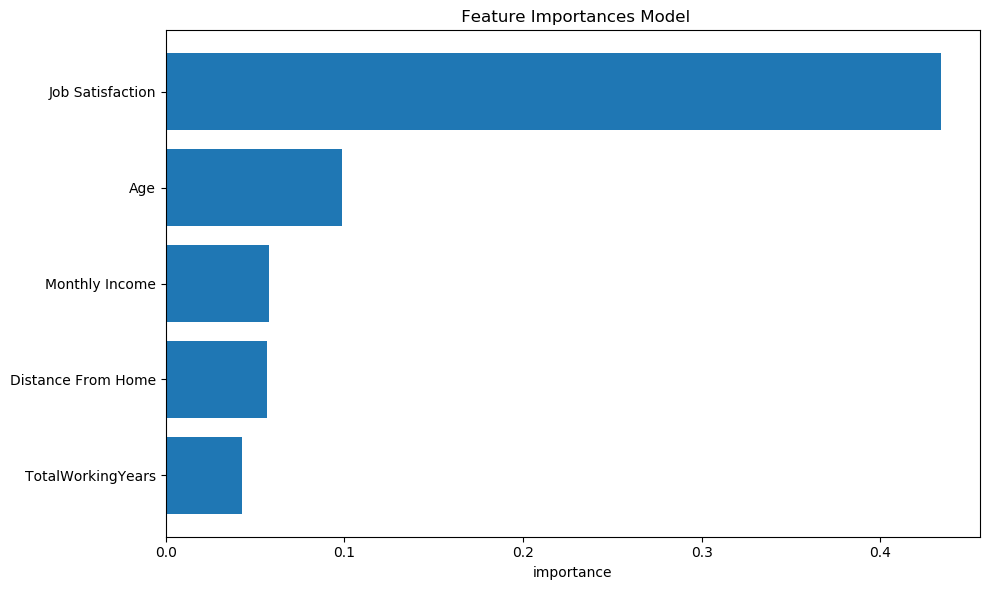

In [355]:
# plor feature importances
create_plot_of_feature_importances(RF_coeff_dict, prepend_title='')
plt.savefig('../reports/figures/model_feat.png', transparent=True);